#### Part 2: This is a Runge-Kutta 4 program to solving for
$\large \ddot x + 2 \zeta \omega_n \dot x + {\omega}_n^2 x = \frac{F(t)}{m}$

#### Where we assume F(t) = 0 and give values k = 63, gamma = .9, and mass = 5

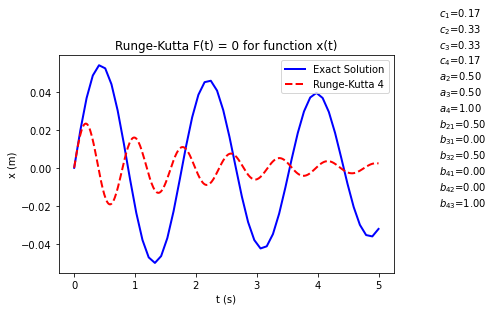

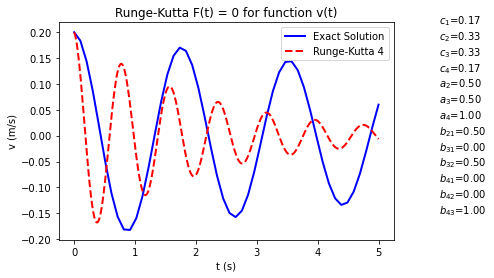

In [5]:
%matplotlib inline

from math import *
import numpy as np
import sympy as sympy
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 63.
gamma = .9
m = 5
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.
f_over_m = lambda t: 0
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x
ti = 0.0
tf = 5.0
n = 375
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d


# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1


def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta F(t) = 0 for function x(t)")
plt.text(1 + tf, -0.02,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta F(t) = 0 for function v(t)")
plt.text(1 + tf, -0.15,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()


### Part 3.1 Solving RK4 for Overdamping

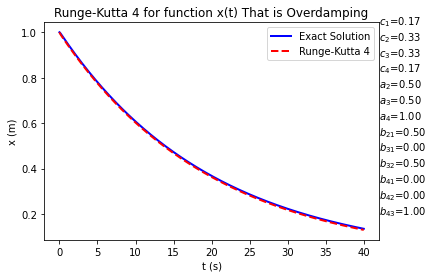

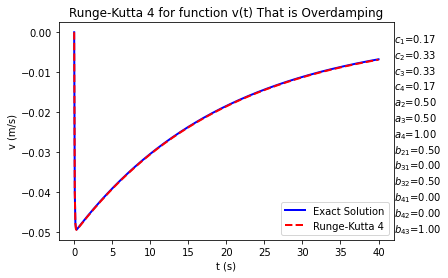

In [2]:
%matplotlib inline

from math import *
import numpy as np
import sympy as sympy
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 5.
gamma = 1
m = 5
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.

fxy_v = lambda t, x, v: -(lambda_I / (lambda_I - lambda_II) * exp(lambda_I * t)) + (-lambda_II / (lambda_II - lambda_I) * exp(lambda_II * t))
fxy_x = lambda t, x, v: -1 / (lambda_I - lambda_II) * exp(lambda_I * t) + 1 / (lambda_II - lambda_I) * exp(lambda_II * t)
ti = 0.0
tf = 40.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 1.0  # x(0) initial value
v_iv = 0.0  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
zeta_od = 10
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x_iv
B = v_iv
CI_od = (B - A * lambda_II) / (lambda_I - lambda_II)
CII_od = (A * lambda_I - B) / (lambda_I - lambda_II)


# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1


def xod_of_t (CI, CII, lI, lII, t):
    return CI * exp(lI * t) + CII * exp(lII * t)


def vod_of_t (CI, CII, lI, lII, t):
    return CI * lI * exp(lI * t) + CII * lII * exp(lII * t)


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
x_od = [xod_of_t(CI_od, CII_od, lambda_I, lambda_II, tval) for tval in x_TS]
v_od = [vod_of_t(CI_od, CII_od, lambda_I, lambda_II, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_od, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t) That is Overdamping")
plt.text(2 + tf, 0.2,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_od, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t) That is Overdamping")
plt.text(2 + tf, -0.05,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()


### Part 3.2 Solv for Critically damped

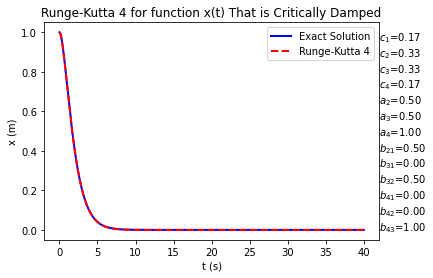

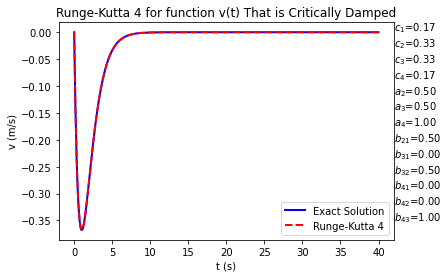

In [3]:
%matplotlib inline

from math import *
import numpy as np
import sympy as sympy
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 5.
gamma = 1
m = 5
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.
fxy_v = lambda t, x, v: -CI_cd * exp(-omega_n * t) + CII_cd * t * exp(-omega_n * t)
fxy_x = lambda t, x, v: exp(-omega_n * t) * (-omega_n * CI_cd + CII_cd * (1 - omega_n * t))
ti = 0.0
tf = 40.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 1.0  # x(0) initial value
v_iv = 0.0  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
zeta_od = 10
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x_iv
B = v_iv
CI_cd = A
CII_cd = B + omega_n * A


# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1


def xcd_of_t (CI, CII, omega_n, t):
    return CI * exp(-omega_n * t) + CII * t * exp(-omega_n * t)


def vcd_of_t (CI, CII, omega_n, t):
    return exp(-omega_n * t) * (-omega_n * CI + CII * (1 - omega_n * t))


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
x_cd = [xcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in x_TS]
v_cd = [vcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_cd, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t) That is Critically Damped")
plt.text(2 + tf, 0,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_cd, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t) That is Critically Damped")
plt.text(2 + tf, -0.35,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()


### Part 3.3 Solving RK4 for Underdamping

Omega_n =  1.0
zeta_ud =  0.1
omega_d =  0.99498743710662


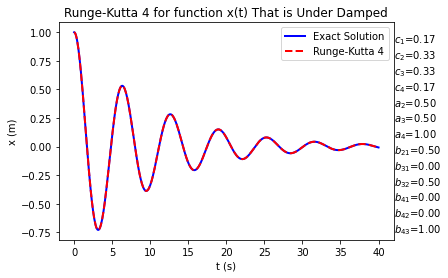

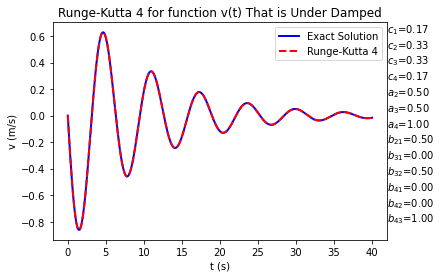

In [16]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 5.
gamma = 1
m = 5
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.
fxy_v = lambda t, x, v: exp(-zeta_ud * omega_n * t) * (-DI * cos(omega_d * t) + DII * sin(omega_d * t))
fxy_x = lambda t, x, v: exp(-zeta_ud * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta_ud * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta_ud * omega_n * sin(omega_d * t)))
ti = 0.0
tf = 40.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 1.0  # x(0) initial value
v_iv = 0.0  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
print("Omega_n = ", omega_n)
zeta_ud = gamma / (2 * m * omega_n)
print("zeta_ud = ", zeta_ud)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
print("omega_d = ", omega_d)
zeta_od = 10
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d


# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1


def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t) That is Under Damped")
plt.text(2 + tf, -0.75,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t) That is Under Damped")
plt.text(2 + tf, -0.8,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()


### Part 4.1 Solving RK4 when F(t)/m = 0

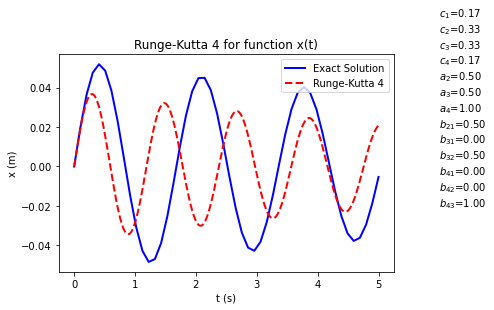

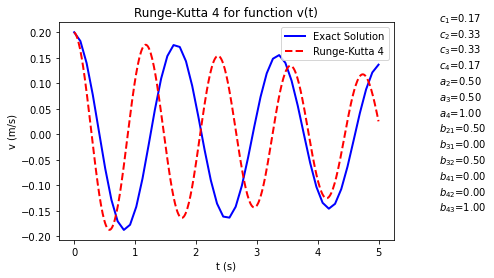

In [6]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 28.
gamma = .3
m = 2
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.
f_over_m = lambda t: 0
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x
ti = 0.0
tf = 5.0
n = 375
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d


# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1


def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t)")
plt.text(1 + tf, -0.02,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t)")
plt.text(1 + tf, -0.15,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()


### Part 4.2 Solving RK4 for F(t)/m = 1

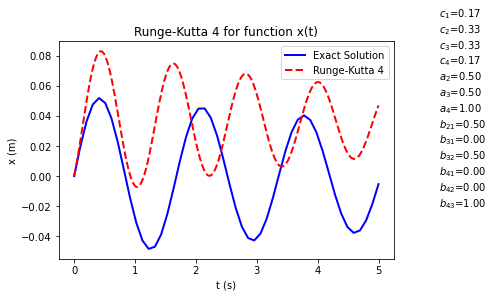

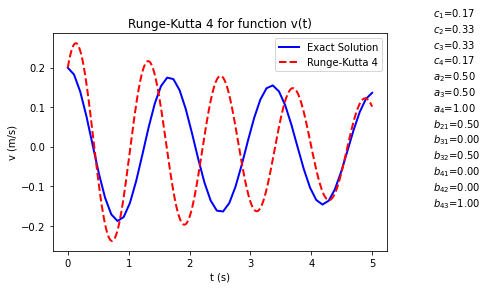

In [7]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 28.
gamma = .3
m = 2
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.
f_over_m = lambda t: 1
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x
ti = 0.0
tf = 5.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d


# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1


def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t)")
plt.text(1 + tf, -0.02,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t)")
plt.text(1 + tf, -0.15,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()


### Part 4.3 Solving RK4 for F(t)/m = t + 3

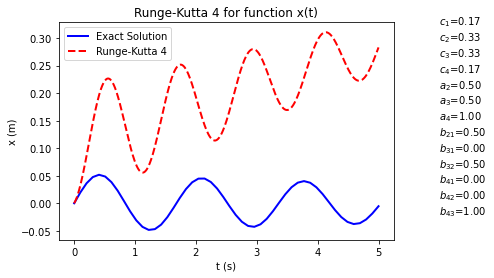

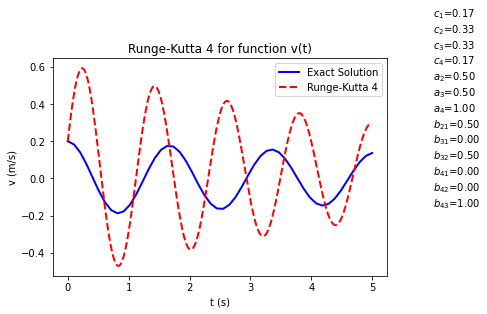

In [8]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 28.
gamma = .3
m = 2
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.
f_over_m = lambda t: t + 3
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x
ti = 0.0
tf = 5.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d


# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1


def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t)")
plt.text(1 + tf, -0.02,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t)")
plt.text(1 + tf, -0.15,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

### Part 5 Solving for RK4 when f(t)/m = 7cos(${\omega}_n$*t)

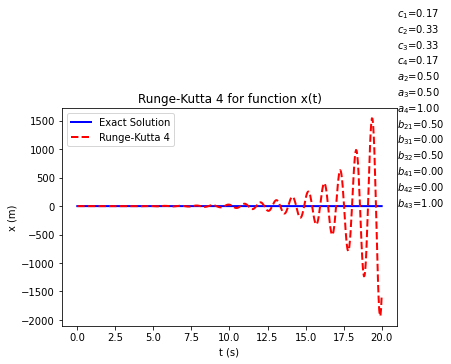

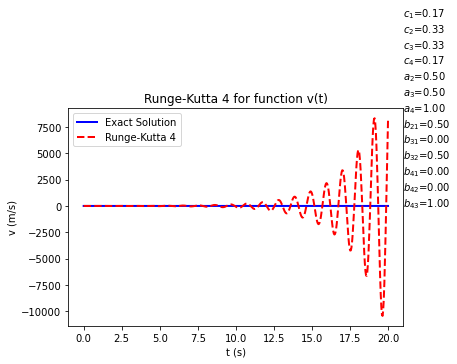

In [16]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gwinters1/engr3703/Ch.7 Using Matplotlib")
from psm_plot import *

# Declared Constants
k = 37.
gamma = .3
m = 2
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.
f_over_m = lambda t: 7 * cos(omega_n * t)
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x
ti = 0.0
tf = 20.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d

# Functions
def rk4_x (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    xip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1


def rk4_v (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1

def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operations
for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v(t[i - 1], x[i - 1], v[i - 1], dt)
    x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
    v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]

# Plotting Graphs
plt.plot(x_TS, x_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t)")
plt.text(1 + tf, -0.02,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t)")
plt.text(1 + tf, -0.15,
         f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()